In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib

In [3]:
IMG_SIZE = (150, 150)

In [4]:
train_data_path = './data/seg_train/seg_train/'
test_data_path = './data/seg_test/seg_test/'
pred_data_path = './data/seg_pred/'


In [5]:
data_dir = pathlib.Path(train_data_path)
class_names = np.array([sorted(item.name for item in data_dir.glob('*'))])

In [6]:
class_names

array([['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']],
      dtype='<U9')

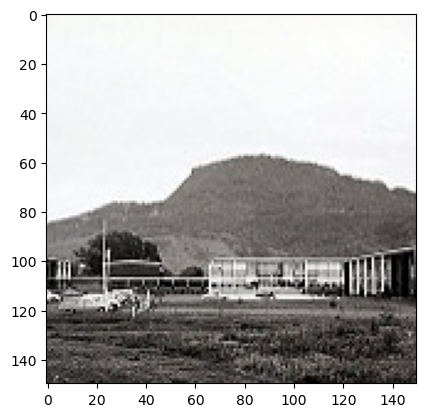

In [7]:
img = plt.imread(f'{train_data_path}/buildings/0.jpg')
plt.imshow(img)

In [8]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    zoom_range=0.2,
    rotation_range=0.4,
    # validation_split=0.8
)

In [9]:
train_data = datagen.flow_from_directory(
    train_data_path,
    target_size=IMG_SIZE,
    # subset='training'
)
test_data = datagen.flow_from_directory(
    test_data_path,
    target_size=IMG_SIZE,
    # subset='training'
)
pred_data = datagen.flow_from_directory(
    pred_data_path,
    target_size=IMG_SIZE,
    # subset='training'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


In [10]:
tbCallBack = tf.keras.callbacks.TensorBoard(log_dir='./tb_model_1', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
model_1 = tf.keras.Sequential([
    layers.Conv2D(8, 6, padding='same', activation='relu', input_shape=(150,150, 3)),
    layers.Conv2D(8, 6, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(16, 5, padding='same', activation='relu'),
    layers.Conv2D(16, 5, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 4, padding='same', activation='relu'),
    layers.Conv2D(32, 4, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(6, activation='sigmoid')
])

model_1.compile(
    optimizer=Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[tbCallBack]
)
